In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X = pd.read_csv("linearX.csv").values
y = pd.read_csv("linearY.csv").values

In [6]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

Data normalizing

In [7]:
# Normalize features (Standardization: Mean = 0, Std Dev = 1)
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std


predictor normalization

In [8]:
# Normalize predictor (X) using Z-score normalization
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

In [9]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m = len(y)  # Number of training examples
    theta_0, theta_1 = 0, 0  # Initial parameters
    cost_history = []
    for iteration in range(num_iterations):
        # Hypothesis
        predictions = theta_0 + theta_1 * X
        errors = predictions - y

        # Cost function
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

        # Gradients
        gradient_theta_0 = (1 / m) * np.sum(errors)
        gradient_theta_1 = (1 / m) * np.sum(errors * X)

        # Update parameters
        theta_0 -= learning_rate * gradient_theta_0
        theta_1 -= learning_rate * gradient_theta_1

    return theta_0, theta_1, cost_history

Training the Model

In [19]:
theta_0, theta_1, cost_history = gradient_descent(X, y, learning_rate=0.5, num_iterations=2000)

plotting

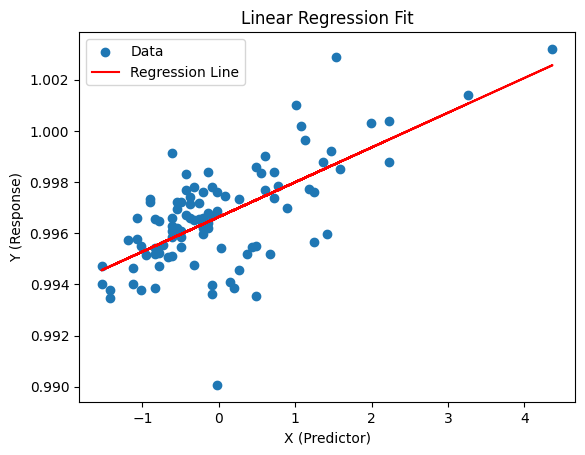

In [23]:
# Plot data points
plt.scatter(X * X_std + X_mean, y * y_std + y_mean, label="Data")  # Convert X back to original scale

# Plot regression line
predicted_y = theta_0 + theta_1 * X
plt.plot(X * X_std + X_mean, predicted_y * y_std + y_mean, color='red', label="Regression Line")

plt.xlabel("X (Predictor)")
plt.ylabel("Y (Response)")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()
